In [30]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy import integrate

# Phase shifts (1st and 2nd order Born)
from H.B. Nersisyan, J.M. Fernández-Varea / Nuclear Instruments and Methods in Physics Research B 311 (2013) 121–130

In [88]:
def phase1(a,k):
    def f(r):
        return np.exp(-a*r)/r*np.sin(k*r)**2
    res = integrate.quad(f,0,np.inf)  
    return 2*k*res[0]/k**2
                                
def phase2(a,k):
    def f(x, y):
        return np.exp(-a*(x+y))/x/y*np.sin(k*x)**2*np.sin(k*y)*np.cos(k*y)
    def bounds_y():
        return [0,np.inf]
    def bounds_x(y):
        return [0,y]
    res= integrate.nquad(f, [bounds_x, bounds_y])
    return 8/k**2*res[0]

def phase0(a,k):
    return 2*k/k**2*0.25*np.log((a**2+(2*k)**2)/a**2)

/Users/grande/anaconda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0, 4)

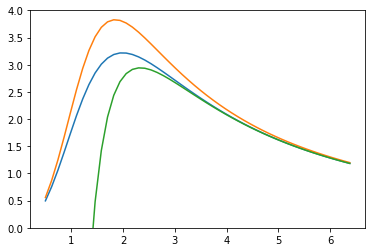

In [89]:
Z = 1
wp = 4
def Bethe(v):
    st=Z**2*wp**2/v**2*np.log(2*v**2/wp)
    return st
def Bohr(v):
    return Z**2*wp**2/v**2*np.log(1.123*v**3/wp/np.abs(Z))
N=50
k=[]
s1=[]
s2=[]
for i in range(N):
    k.append(i/N*6+0.5)
    a=wp/k[i]
    s1.append(Z*wp**2/k[i]*Z*phase1(a,k[i]))
    s2.append(Z*wp**2/k[i]*Z**2*phase2(a,k[i]))
v = np.array(k) 
ss1=np.array(s1)
ss2=np.array(s2)
plt.plot(v,ss1)
plt.plot(v,ss1+ss2)    
plt.plot(v,Bethe(v)) 
#plt.plot(v,Bohr(v),'.')
plt.ylim(0,4)


(0, 1)

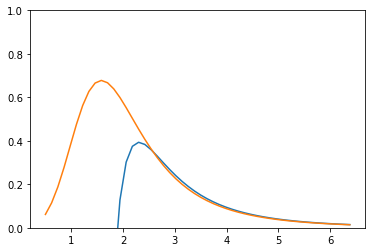

In [90]:
sbarkas = Z*wp/v**3*Z**2*wp**2/v**2*np.log(1.123*v**2/wp)
plt.plot(v,sbarkas)
plt.plot(v,ss2)
plt.ylim(0,1)

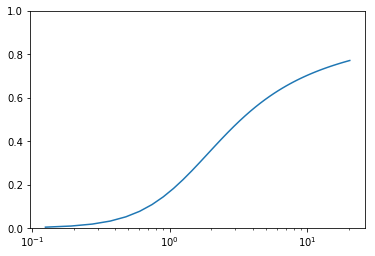

In [97]:
ratio = ss2/ ss1*v**3/wp
plt.plot(2*v**2/wp,ratio)
plt.ylim(0,1)
plt.xscale('log')

# results from ph_shift_test2.dpr for Z= 1 and -1 on rs=2

In [38]:
rs = 2.00
vf  = 1.919/rs
wp  = np.sqrt(4/3/np.pi*vf**3)
print(wp)

0.6122966743


(2, 10)

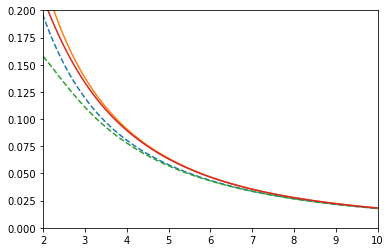

In [15]:
f = open('test_tcs1.dat','r')
lines = f.readlines()
vel=[]
tcs=[]
ida=[]
bethe=[]
for line in lines:
    p = line.split()
    vel.append(float(p[0]))  
    tcs.append(float(p[1]))
    ida.append(float(p[2]))
    bethe.append(float(p[3]))  
f = open('test_tcs-1.dat','r')
lines = f.readlines()
vel1=[]
tcs1=[]
ida1=[]
bethe1=[]
for line in lines:
    p = line.split()
    vel1.append(float(p[0]))  
    tcs1.append(float(p[1]))
    ida1.append(float(p[2]))
    bethe1.append(float(p[3]))      
plt.plot(vel,tcs,'--')
plt.plot(vel,ida)
plt.plot(vel,tcs1,'--')
plt.plot(vel,ida1)
plt.ylim(0,0.2)
plt.xlim(2,10)

(2, 10)

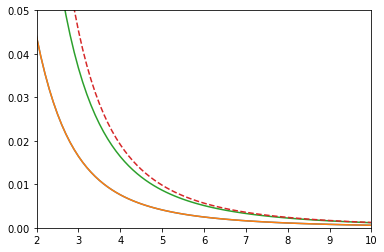

In [41]:
barkas_ida=[]
for i in range(len(ida)):
    barkas_ida.append((ida[i]-ida1[i])/(ida[i]+ida1[i]))
plt.plot(vel,barkas_ida)  
mm=[]
barkas_tcs=[]
for i in range(len(tcs)):
    barkas_tcs.append((tcs[i]-tcs1[i])/(tcs[i]+tcs1[i]))
    mm.append(2*wp/vel[i]**3)
plt.plot(vel,barkas_ida)    
plt.plot(vel,barkas_tcs)
plt.plot(vel,mm,'--')
plt.ylim(0,0.05)
plt.xlim(2,10)

# Conclusion : The Barkas effect for TCS is twice than IDA

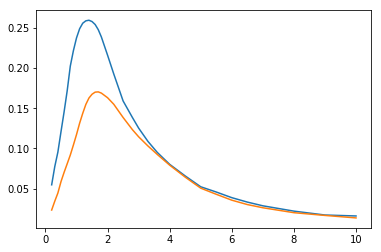

In [47]:
rs = 2.07
vf  = 1.919/rs
wp  = np.sqrt(4/3/np.pi*vf**3)
proton=loadtxt('stopping-force-rs-2.07_proton_tddft_weak-correlation.dat',float)
anti=loadtxt('stopping-force-rs-2.07_antiproton_tddft_weak-correlation.dat',float)
p=np.array(proton)
a=np.array(anti)
plt.plot(p[:,0],p[:,1])
plt.plot(a[:,0],a[:,1])
barkas=[]
mm=[]
for i in range(len(p[:,1])):
    barkas.append((p[i,1]-a[i,1])/(p[i,1]+a[i,1]))
    mm.append(2*wp/p[i,0]**3)

(0, 0.5)

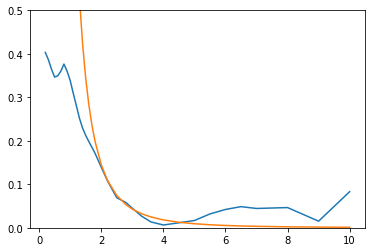

In [40]:
mm=np.array(mm)
plt.plot(p[:,0],barkas)
plt.plot(p[:,0],mm)
plt.ylim(0,0.5)